In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D

/Users/austinriis-due/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


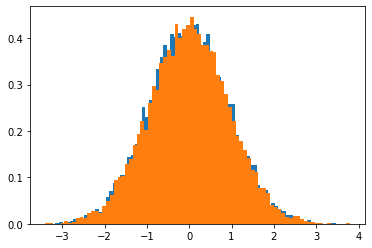

In [43]:
## Gibbs Sampler
## X, Y joint bivariate normal
rho = 0.35
x0 = st.norm.rvs(0,1-rho**2)
Y = []
X = [x0]
T = 10**4
for t in range(T):
    y = st.norm.rvs(rho*X[-1],1-rho**2)
    Y.append(y)
    x = st.norm.rvs(rho*Y[-1],1-rho**2)
    X.append(x)
plt.hist(X,bins=80,density=True)
plt.hist(Y,bins=80,density=True)
#sns.kdeplot([st.multivariate_normal.rvs([0,0])])
plt.show()

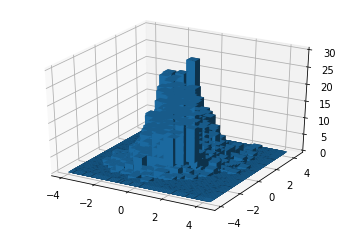

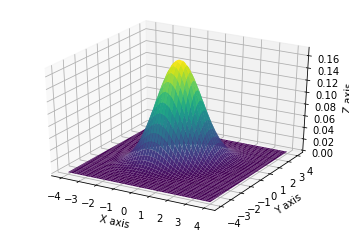

In [44]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = X[1:],Y
hist, xedges, yedges = np.histogram2d(x, y, bins=80, range=[[-4, 4], [-4, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.01, yedges[:-1] + 0.01, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

mu_x = 0
variance_x = 1

mu_y = 0
variance_y = 1

#Create grid and multivariate normal
x = np.linspace(-4,4,500)
y = np.linspace(-4,4,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = st.multivariate_normal([mu_x, mu_y], [[variance_x, 0.35], [0.35, variance_y]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [14]:
st.pearsonr(X[1:],Y)

(0.3344779807536097, 6.280483625731448e-260)

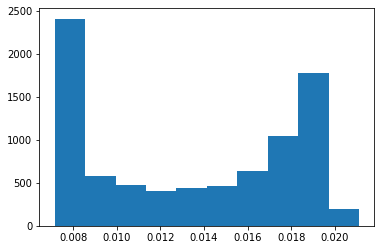

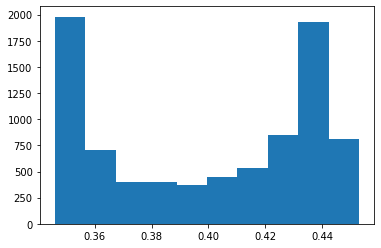

In [130]:
W1 = []
W2 = []
i=0
for T in range(10000):
    try:
        w1 = np.random.uniform()
        w2 = 1 - w1
        for x in range(10000):
            w1 = w1 - 0.02*(2*w1 - (w2**4))
            w2 = w2 - 0.02*((w1**2) - 4*(w1**3))
        W1.append(w1)
        W2.append(w2)
    except:
        i+=1
plt.hist(W1)
plt.figure(2)
plt.hist(W2)
plt.show()

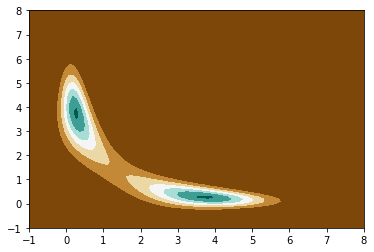

In [2]:
f = lambda x, y: np.exp(-(x*x*y*y+x*x+y*y-8*x-8*y)/2.)
xx = np.linspace(-1, 8, 100)
yy = np.linspace(-1, 8, 100)
xg,yg = np.meshgrid(xx, yy)
z = f(xg.ravel(), yg.ravel())
z2 = z.reshape(xg.shape)
plt.contourf(xg, yg, z2, cmap='BrBG')
plt.show()

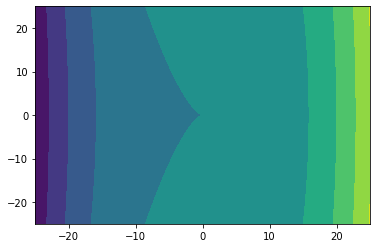

In [43]:
delta = 0.025
X = np.arange(-25,25,delta)
Y = np.arange(-25,25,delta)
x,y = np.meshgrid(X,Y)
z = x**3 + y**2
plt.contourf(x,y,z)
plt.show()

In [39]:
eta = 0.01
J = [1,2]
j = lambda w1,w2: w1**3+w2**2
djdw1 = lambda w1,w2: 3*w1**2 + w2**2
djdw2 = lambda w1,w2: w1**3 + 2*w2
w1,w2 = np.random.uniform(size=2)
while abs(J[-2] - J[-1]) > 10**-8:
    J.append(j(w1,w2))
    tau1 = w1 - eta*djdw1(w1,w2)
    tau2 = w2 - eta*djdw2(w1,w2)
    w1 = tau1
    w2 = tau2

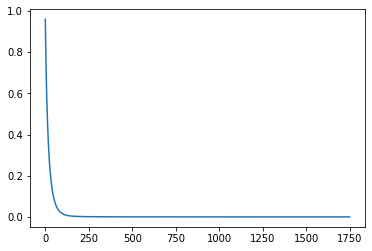

In [40]:
plt.plot(J[2:])
plt.show()

In [41]:
J[-1]

6.076575827438412e-06

In [42]:
w1,w2

(0.018238182642196822, -3.3137830669925707e-06)

In [44]:
1/1.15

0.8695652173913044

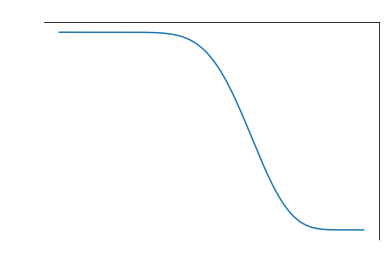

In [49]:
P = [x / 1000 for x in range(1000)]
power = [st.binom.cdf(12,20,p) for p in P]
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot()

ax.set_xlabel('p')
ax.set_ylabel('Power')

ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black

ax.spines['left'].set_color('white')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('white')         #setting up above X-axis tick color to red

plt.plot(P,power)
plt.title("Power Function",c='white',loc='left')
plt.xlabel("p",c='white')
plt.ylabel("Power",c='white')
plt.show()